In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
dataset = "HU"
key_idx = 0

keys = ["random",  "cluster_random", "influencer","cluster_influencer"]
df_name = "outputs/%s_%s.csv"%(dataset, keys[key_idx])

In [3]:
df = pd.read_csv(df_name, index_col="index")
df = df.drop(["label"], axis=1)
df.shape

(47538, 634)

In [4]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            47528, 47529, 47530, 47531, 47532, 47533, 47534, 47535, 47536,
            47537],
           dtype='int64', name='index', length=47538)

In [5]:
df.head()

,i0_f0,i0_f47,i0_f94,i0_f141,i0_f188,i0_f235,i0_f282,i0_f329,i0_f376,i0_f423,...,i4_f12643,i4_f12690,i4_f12737,i4_f12784,i4_f12831,i4_f12878,i4_f12925,i4_f12972,i4_f13019,i4_f13066
index,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df_means = pd.read_csv("master/outputs/cluster_means/%s_means.csv"%dataset)
df_emb = pd.read_csv("master/outputs/embeddings/%s_embedding.csv"%dataset)
df_edges = pd.read_csv("master/data/%s_edges.csv"%dataset, index_col="node_1")
with open('master/outputs/assignments/%s.json'%dataset) as json_file:  
    labels = json.load(json_file)
    
df_label = pd.DataFrame({"index" : list(labels.keys()), "label" : list(labels.values())})
df_label["index"] = df_label["index"].astype(int)
df_label = df_label.set_index("index")
df_label = df_label.sort_index()
print(df_label.shape)
df_label.head()

n_class = len(np.unique(df_label.label))

(47538, 1)


explained var 0.87


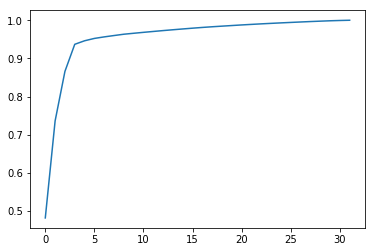

In [7]:
pca = PCA().fit(df_emb)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print("explained var %.2f"%sum(pca.explained_variance_ratio_[:3]))

In [8]:
pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(df_emb)

In [9]:
columns = df.columns

In [10]:
idx = 0
labels = df_label.label.values.copy()
labels[df[columns[idx]]] = -1

In [11]:
colors_choice = ["C0", "C1", "C2", "C3", "C4", "C8", "C9"]

In [12]:
colors = [colors_choice[i%len(colors_choice)] for i in range(n_class)]
colors.append("k")

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [19]:
duration = 3
fps = 12

end = len(columns) - 1
end = 200

batch = int(end / (duration * fps))
print("batch", batch)

frames = []
for i in range(end // batch + 1):
    idx_end = min(end - 1, (i + 1) * batch)
    frames.append(idx_end)
    
alpha = 0.03

batch 5


Text(0.5, 0.92, 'Diffusion 477 / 47538 (1.17%)')

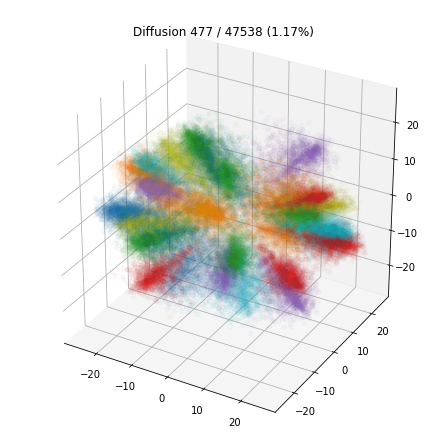

In [20]:
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)

i = 0
col = df[columns[i]]
labels = df_label.label.values.copy()
labels[col] = len(colors)

ax.cla()
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
           c=labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=alpha)

limit = 28
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.set_title("Diffusion %i / %i (%.2f%%)"
             %(sum(col), len(df), 100 * sum(col) / len(np.unique(df_edges.node_2))))

In [21]:
def update(i):
    if i % batch == 0:
        print('frame %i'%i)
    col = df[columns[i]]
    labels = df_label.label.values.copy()
    labels[col] = len(colors)
    
    ax.cla()
    ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
           c=labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=alpha)
    
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    ax.set_title("Diffusion %i / %i (%.2f%%)"
                 %(sum(col), len(df), 100 * sum(col) / len(np.unique(df_edges.node_2))))
    return ax

anim = FuncAnimation(fig, update, frames=frames, interval=1000 / fps)

fname = '%s_%is_%ifps_alpha_%.2f_end%i.gif'%(df_name, duration, fps, alpha, end)
anim.save(fname, dpi=80, writer='imagemagick')
print(fname)

plt.close()

frame 5
frame 5
frame 10
frame 15
frame 20
frame 25
frame 30
frame 35
frame 40
frame 45
frame 50
frame 55
frame 60
frame 65
frame 70
frame 75
frame 80
frame 85
frame 90
frame 95
frame 100
frame 105
frame 110
frame 115
frame 120
frame 125
frame 130
frame 135
frame 140
frame 145
frame 150
frame 155
frame 160
frame 165
frame 170
frame 175
frame 180
frame 185
frame 190
frame 195
outputs/HU_random.csv_3s_12fps_alpha_0.03_end200.gif
